In [1]:
from sklearn.utils import shuffle
import numpy as np
import tensorflow as tf

In [2]:
M = 2 #input dimension
K = 3 #class size
n = 100 #number of data
N = n * K #all data

In [20]:
X1 = np.random.randn(n, M) + np.array([0, 10])
X2 = np.random.randn(n, M) + np.array([5, 5])
X3 = np.random.randn(n, M) + np.array([10, 0])
Y1 = np.array([[1, 0, 0] for i in range(n)])
Y2 = np.array([[0, 1, 0] for i in range(n)])
Y3 = np.array([[0, 0, 1] for i in range(n)])

X = np.concatenate((X1, X2, X3), axis = 0)
Y = np.concatenate((Y1, Y2, Y3), axis = 0)

In [26]:
print(Y1[0])

[1 0 0]


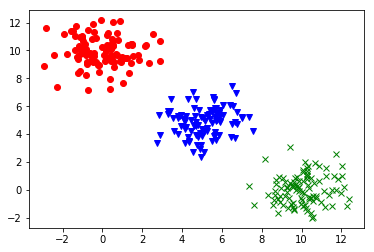

In [37]:
import matplotlib.pyplot as plt

for i in X1:
    plt.plot(i[0] ,i[1], "ro")
for j in X2:
    plt.plot(j[0] ,j[1], "bv")
for k in X3:
    plt.plot(k[0] ,k[1], "gx")
#plt.scatter(X1[;][0] ,X1[;][1])
#plt.plot(X2 ,Y2, "ro")
#plt.plot(x1[0][0], x1[0][1], "ro")
#plt.plot(x1[0][0], x1[0][1], "ro")
plt.savefig("multi-class-rogistic.png")
plt.show()

In [9]:
w = tf.Variable(tf.zeros([M, K]))
b = tf.Variable(tf.zeros([K]))

x = tf.placeholder(tf.float32, shape=[None, M])
t = tf.placeholder(tf.float32, shape=[None, K])
y = tf.nn.softmax(tf.matmul(x, w) + b)

In [10]:
#mini batch
cross_entropy = tf.reduce_mean(-tf.reduce_sum(t*tf.log(y), reduction_indices=[1]))

In [11]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

In [12]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(t, 1))

In [13]:
batch_size = 50 #mini-batch size
n_batches = N

In [14]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [15]:
for epoch in range(20):
    X_, Y_ = shuffle(X, Y)
    
    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size
        
        sess.run(train_step, feed_dict = {
            x : X_[start:end],
            t : Y_[start:end]
        })

In [17]:
X_, Y_ = shuffle(X, Y)

classified = correct_prediction.eval(session = sess, feed_dict = {
    x: X_[0:10],
    t: Y_[0:10]
})
prob = y.eval(session = sess, feed_dict = {
    x: X_[0:10]
})

print(classified)
print()
print(prob)

[ True  True  True  True  True  True  True  True  True  True]

[[6.27366360e-03 9.44440484e-01 4.92859036e-02]
 [9.85789239e-01 1.42106153e-02 1.11210525e-07]
 [9.85846460e-01 1.41534768e-02 1.97486241e-08]
 [9.73096430e-01 2.69035250e-02 2.77559558e-08]
 [7.63960695e-03 9.87617195e-01 4.74325242e-03]
 [1.09227998e-02 9.87061918e-01 2.01524771e-03]
 [9.99835610e-01 1.64418903e-04 1.98124434e-11]
 [9.84038711e-01 1.59613378e-02 4.06686382e-08]
 [9.93075577e-09 5.15350746e-03 9.94846463e-01]
 [9.92006123e-01 7.99384993e-03 3.56285774e-08]]
